## Modelos  Predicción de datos de Series Temporales.

## Trafico de Madrid. Calle Bravo Murillo
### (Estación de Aforo E19). Predicción por horas en una semana.

In [1]:
## realizamos predicción del Trafico por hora en la Calle Bravo Murillo.
## Para los dias de la próxima semana 
## 7 días - 24 horas.

In [2]:
## para realizar predicción de 7 dias, precisamos al menos datos de 35 dias
## seleccionamos un archivo con los datos reales de junio y julio.
## ya revisado y preparado con la fecha correcta de dia-hora.

## Modelo 1. Exponential Smoothing.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
# buscamos el archivo con los datos y indexamos la fecha.
df = pd.read_csv('TrafhorasE19BrMur1sentv6.csv')
df['time']=pd.to_datetime(df['time'])
df.set_index('time',inplace=True)
df.head()

,value
time,
2021-06-01 01:00:00,51.0
2021-06-01 02:00:00,14.0
2021-06-01 03:00:00,10.0
2021-06-01 04:00:00,6.0
2021-06-01 05:00:00,7.0


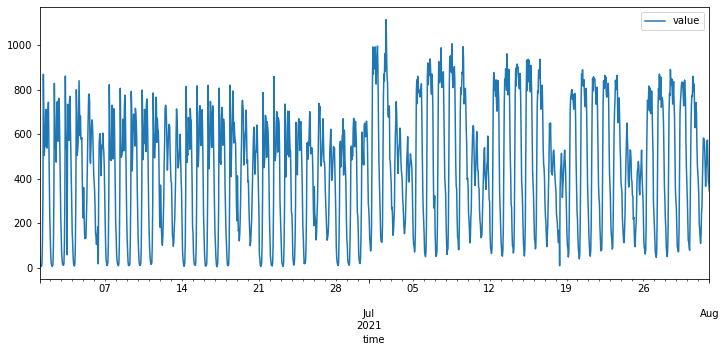

In [5]:
df.plot(figsize=(12,5))

In [6]:
# se ve el ciclo diario de 24 horas, con poco trafico en horas de noche.

In [7]:
df.index.freq = 'H'
df.index

DatetimeIndex(['2021-06-01 01:00:00', '2021-06-01 02:00:00',
               '2021-06-01 03:00:00', '2021-06-01 04:00:00',
               '2021-06-01 05:00:00', '2021-06-01 06:00:00',
               '2021-06-01 07:00:00', '2021-06-01 08:00:00',
               '2021-06-01 09:00:00', '2021-06-01 10:00:00',
               ...
               '2021-07-31 15:00:00', '2021-07-31 16:00:00',
               '2021-07-31 17:00:00', '2021-07-31 18:00:00',
               '2021-07-31 19:00:00', '2021-07-31 20:00:00',
               '2021-07-31 21:00:00', '2021-07-31 22:00:00',
               '2021-07-31 23:00:00', '2021-08-01 00:00:00'],
              dtype='datetime64[ns]', name='time', length=1464, freq='H')

In [37]:
len(df)

1464

In [38]:
train = df.iloc[:1296] 
test = df.iloc[1296:]
# el test en con los datos de la ultima semana del mes de julio (7x24 horas).
# 7 x 24 horas = 168 horas.

In [39]:
# generamos el modelo.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['value'],trend='add',seasonal='add', seasonal_periods=24).fit()

test_predictions = fitted_model.forecast(168)
test_predictions

C:\Users\ahija\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


2021-07-25 01:00:00    237.026923
2021-07-25 02:00:00    144.812223
2021-07-25 03:00:00     99.317394
2021-07-25 04:00:00     66.717641
2021-07-25 05:00:00     63.064561
                          ...    
2021-07-31 20:00:00    911.555844
2021-07-31 21:00:00    793.533275
2021-07-31 22:00:00    696.783111
2021-07-31 23:00:00    649.504584
2021-08-01 00:00:00    598.317818
Freq: H, Length: 168, dtype: float64

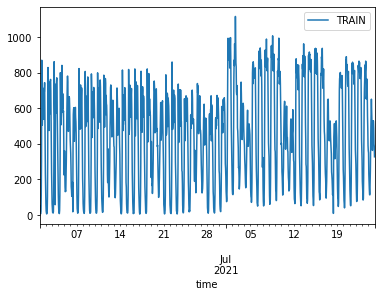

In [40]:
# pintamos los resultados en varias graficas para ver la previsión mejor.
train['value'].plot(legend=True,label='TRAIN')

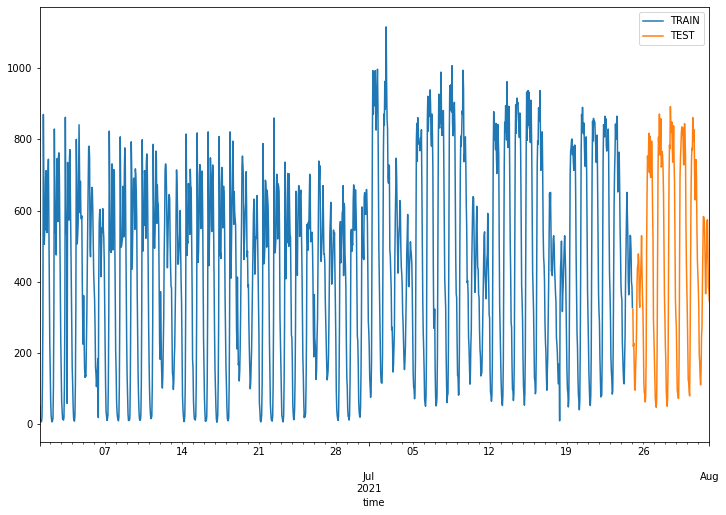

In [41]:
train['value'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['value'].plot(legend=True,label='TEST')

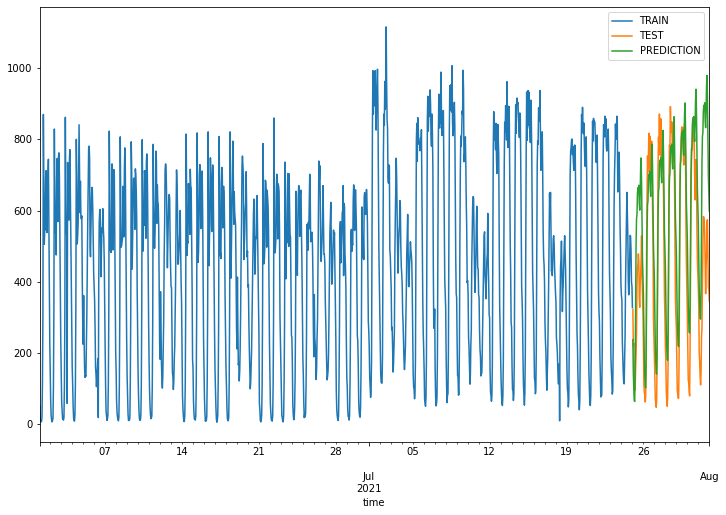

In [42]:
train['value'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['value'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION');

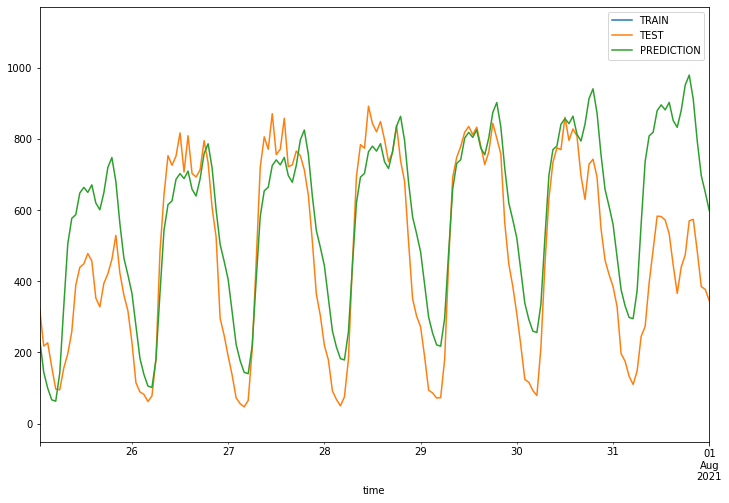

In [43]:
# pintamos los datos de predicción en el mes de julio.
train['value'].plot(legend=True,label='TRAIN')
test['value'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2021-07-25 1:00:00','2021-08-01 0:00:00 ']);

In [45]:
# evaluamos la métrica de los resultados.
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['value'],test_predictions)

144.17370619994372

In [46]:
test['value'].describe()

count    168.000000
mean     474.303571
std      264.424553
min       47.000000
25%      219.750000
50%      458.000000
75%      734.500000
max      892.000000
Name: value, dtype: float64

In [47]:
np.sqrt(mean_squared_error(test['value'],test_predictions))

179.32871210526307

In [48]:
# error sqrt. respecto a la media del valor de los datos.
179.3*100/474.3

37.803078220535525

In [20]:
# el error en la predicción del test es del 37,8%, es un poco alto para el tipo
# de datos que manejamos.


In [50]:
# predecimos los datos con este modelo para agosto. con este error.

fitted_pred168 = ExponentialSmoothing(df['value'],trend='add',seasonal='add', seasonal_periods=24).fit()

pred168 = fitted_pred168.forecast(168)
pred168

C:\Users\ahija\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


2021-08-01 01:00:00     270.681172
2021-08-01 02:00:00     175.558231
2021-08-01 03:00:00     148.891901
2021-08-01 04:00:00     108.045977
2021-08-01 05:00:00      97.944442
                          ...     
2021-08-07 20:00:00    1099.971498
2021-08-07 21:00:00     971.732661
2021-08-07 22:00:00     864.937742
2021-08-07 23:00:00     829.644836
2021-08-08 00:00:00     777.635593
Freq: H, Length: 168, dtype: float64

In [52]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 1.

pred168.to_csv('Pred7dMod1horasE19BM.csv')

## Modelo 2. SARIMAX

In [8]:
# al tener modelos más complejos, retiramos los avisos warnings.
import warnings
warnings.filterwarnings("ignore")

In [9]:
# los datos ya los tenemos en 'df'
# datos desde el 31/07/2021 (la ultima hora del ultimo dia esta como 01/08/2021 00:00)


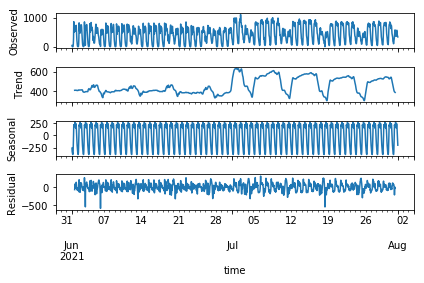

In [10]:
# representamos la descomposición estacional.
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(df['value'])
result.plot();

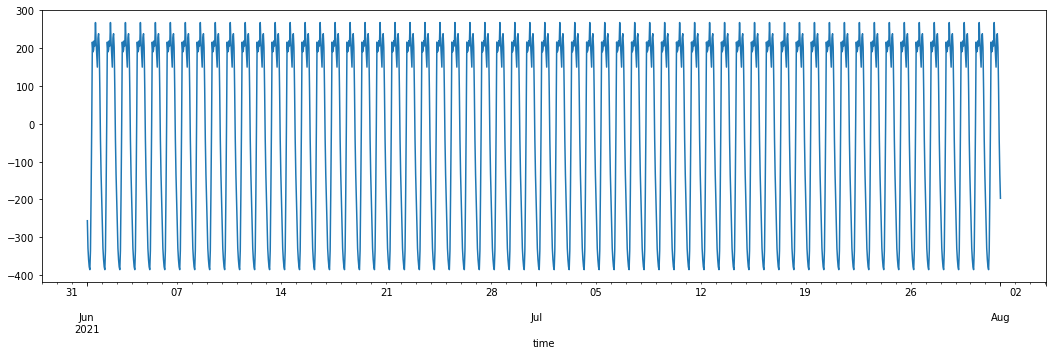

In [11]:
# puede que haya estacinalidad a nivel semanal.
result.seasonal.plot(figsize=(18,5));

In [12]:
len(df)

1464

In [14]:
# vamos a pronosticar los datos de la primera semana de agosto. 7 días/24 horas.
# realizamos los archivos de 'train' y 'test'.

train = df.iloc[:1296]
test = df.iloc[1296:]

In [15]:
# 1º pronostico. Modelo SARIMA. Obtenemos valores del modelo.
from pmdarima import auto_arima 

auto_arima(df['value'],seasonal=True,m=24).summary()

C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 24); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(2, 0, 1, 24); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1464
Model:             SARIMAX(1, 1, 1)x(2, 0, 2, 24)   Log Likelihood               -8393.933
Date:                            Sun, 12 Sep 2021   AIC                          16803.866
Time:                                    12:53:38   BIC                          16846.172
Sample:                                         0   HQIC                         16819.646
                                           - 1464                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0068      0.005     -1.313      0.189      -0.017       0.003
ar.L1          0.7886      0.019     41.347      0.000       0.751       0.826
ma.L1         -0.9934      0.005   -184.066      0.000      -1.004      -0.983
ar.S.L24       0.9420      0.004    228.403      0.000       0.934       0.950
ar.S.L48       0.0543      0.004     12.471      0.000       0.046       0.063
ma.S.L24      -0.5269      0.023    -22.818      0.000      -0.572      -0.482
ma.S.L48      -0.3619      0.025    -14.498      0.000      -0.411      -0.313
sigma2      7588.9361    221.905     34.199      0.000    7154.010    8023.862
===================================================================================
Ljung-Box (Q):                      157.85   Jarque-Bera (JB):              1882.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# ahora generamos nuestro modelo utilizando los indicadores de SARIMAX.

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['value'],order=(1,1,1),seasonal_order=(2,0,2,24),enforce_invertibility=False)
results = model.fit()
results.summary()

C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              value   No. Observations:                 1296
Model:             SARIMAX(1, 1, 1)x(2, 0, 2, 24)   Log Likelihood               -7587.918
Date:                            Sun, 12 Sep 2021   AIC                          15189.835
Time:                                    12:55:47   BIC                          15225.999
Sample:                                06-01-2021   HQIC                         15203.407
                                     - 07-25-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7802      0.030     26.179      0.000       0.722       0.839
ma.L1         -0.9978      0.013    -76.007      0.000      -1.024      -0.972
ar.S.L24       0.9955      0.145      6.873      0.000       0.712       1.279
ar.S.L48      -0.0056      0.141     -0.040      0.968      -0.281       0.270
ma.S.L24      -0.5392      0.160     -3.374      0.001      -0.852      -0.226
ma.S.L48      -0.3070      0.117     -2.618      0.009      -0.537      -0.077
sigma2       1.23e+04    565.029     21.771      0.000    1.12e+04    1.34e+04
===================================================================================
Ljung-Box (Q):                      147.82   Jarque-Bera (JB):              1686.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

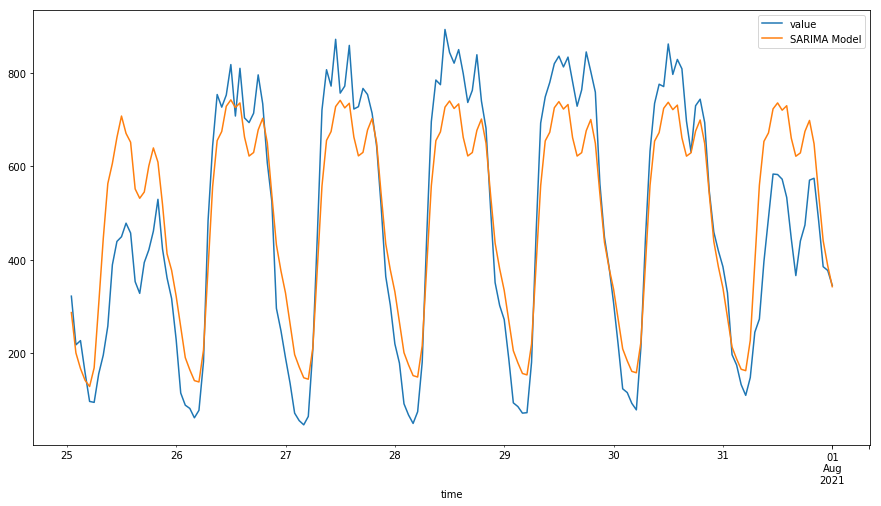

In [19]:
# predecimos los valores (últimos 31 dias, corresponde a datos de juLio)
start=len(train)
end=len(train)+len(test)-1

predictions = results.predict(start,end).rename('SARIMA Model')

# y lo pintamos junto a los datos reales del 'test'
test['value'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)

In [20]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['value'],predictions)

95.23897859849292

In [21]:
test['value'].describe()

count    168.000000
mean     474.303571
std      264.424553
min       47.000000
25%      219.750000
50%      458.000000
75%      734.500000
max      892.000000
Name: value, dtype: float64

In [23]:
np.sqrt(mean_squared_error(test['value'],predictions))

113.28920806589525

In [24]:
# error sqrt.
113.3*100/474.3

23.887834703773983

In [20]:
# el error en la predicción del test es del 23,9%, mejora el modelo anterior.
# anterior

# vamos a seguir estudiando otros modelos y elegimos aquel que nos de mejor
# predicción en el test, para realizar la PREDICCIÓN de la siguiente semana en AGOSTO.

In [26]:
# predecimos los datos con este modelo para agosto. modelo 2.
horas= 168

model2 = SARIMAX(df['value'],order=(1,1,1),seasonal_order=(2,0,2,24),enforce_invertibility=False)
predic2 = model2.fit()
start=len(df)
end=len(df)+horas-1

predicmodel2 = predic2.predict(start,end).rename('SARIMA Model')
predicmodel2


C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2021-08-01 01:00:00    285.056121
2021-08-01 02:00:00    187.306841
2021-08-01 03:00:00    165.708365
2021-08-01 04:00:00    133.629845
2021-08-01 05:00:00    122.345435
2021-08-01 06:00:00    176.126761
2021-08-01 07:00:00    320.127436
2021-08-01 08:00:00    426.728099
2021-08-01 09:00:00    531.249330
2021-08-01 10:00:00    581.203359
2021-08-01 11:00:00    658.300152
2021-08-01 12:00:00    651.802852
2021-08-01 13:00:00    642.334604
2021-08-01 14:00:00    636.069538
2021-08-01 15:00:00    552.417177
2021-08-01 16:00:00    500.783887
2021-08-01 17:00:00    551.622222
2021-08-01 18:00:00    589.445966
2021-08-01 19:00:00    633.200254
2021-08-01 20:00:00    609.995770
2021-08-01 21:00:00    504.340799
2021-08-01 22:00:00    395.090521
2021-08-01 23:00:00    360.765152
2021-08-02 00:00:00    315.944986
2021-08-02 01:00:00    251.913659
2021-08-02 02:00:00    173.479144
2021-08-02 03:00:00    154.251515
2021-08-02 04:00:00    128.693634
2021-08-02 05:00:00    123.411781
2021-08-02 06:

In [27]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 2.

predicmodel2.to_csv('Pred7Mod2horasE19BM.csv')

## Modelo 3. RNN

In [8]:
# uso de redes neuronales para predecir datos de una serie temporal

# ya tengo la base de datos 'df'
df.head()

,value
time,
2021-06-01 01:00:00,51.0
2021-06-01 02:00:00,14.0
2021-06-01 03:00:00,10.0
2021-06-01 04:00:00,6.0
2021-06-01 05:00:00,7.0


In [9]:
# definimos nuestros paquetes de datos de entrenamiento y test.
# realmente ya los tenemos definidos de los modelos anteriores, pero por si acaso.
len(df)

1464

In [10]:
# tomamos 168 horas de test (11,5% de los datos)
train = df.iloc[:1296]
test = df.iloc[1296:]
test

,value
time,
2021-07-25 01:00:00,322.0
2021-07-25 02:00:00,218.0
2021-07-25 03:00:00,227.0
2021-07-25 04:00:00,159.0
2021-07-25 05:00:00,97.0
...,...
2021-07-31 20:00:00,574.0
2021-07-31 21:00:00,484.0
2021-07-31 22:00:00,385.0


In [11]:
# normalizamos los datos entre 0 y 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [12]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
# ahora generamos el modelo con RNN
from keras.preprocessing.sequence import TimeseriesGenerator
scaled_test

array([[0.28532853],
       [0.19171917],
       [0.19981998],
       [0.13861386],
       [0.08280828],
       [0.0810081 ],
       [0.13591359],
       [0.17191719],
       [0.22772277],
       [0.34563456],
       [0.39063906],
       [0.39963996],
       [0.42574257],
       [0.40684068],
       [0.31323132],
       [0.29072907],
       [0.35013501],
       [0.37443744],
       [0.41044104],
       [0.47164716],
       [0.37623762],
       [0.32043204],
       [0.28082808],
       [0.20162016],
       [0.0990099 ],
       [0.07560756],
       [0.06930693],
       [0.05130513],
       [0.06570657],
       [0.15931593],
       [0.43024302],
       [0.57425743],
       [0.67326733],
       [0.6489649 ],
       [0.67236724],
       [0.73087309],
       [0.63186319],
       [0.72367237],
       [0.62826283],
       [0.61926193],
       [0.63726373],
       [0.71107111],
       [0.65526553],
       [0.54185419],
       [0.46714671],
       [0.26192619],
       [0.21872187],
       [0.166

In [14]:
# creamos el modelo.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [15]:
# definimos el modelo RNN, con la estacionalidad semanal.
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit_generator(generator,epochs=25)

C:\Users\ahija\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
1272/1272 [==============================] - 9s 7ms/step - loss: 0.0242
Epoch 2/25
1272/1272 [==============================] - 8s 7ms/step - loss: 0.0102
Epoch 3/25
1272/1272 [==============================] - 8s 6ms/step - loss: 0.0097
Epoch 4/25
1272/1272 [==============================] - 8s 7ms/step - loss: 0.0072
Epoch 5/25
1272/1272 [==============================] - 9s 7ms/step - loss: 0.0064
Epoch 6/25
1272/1272 [==============================] - 8s 6ms/step - loss: 0.0059
Epoch 7/25
1272/1272 [==============================] - 8s 7ms/step - loss: 0.0055
Epoch 8/25
1272/1272 [==============================] - 8s 7ms/step - loss: 0.0051
Epoch 9/25
1272/1272 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 10/25
1272/1272 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 11/25
1272/1272 [==============================] - 9s 7ms/step - loss: 0.0039
Epoch 12/25
1272/1272 [==============================] - 8s 6ms/step - loss: 0.0040
E

In [18]:
model.history.history.keys()

dict_keys(['loss'])

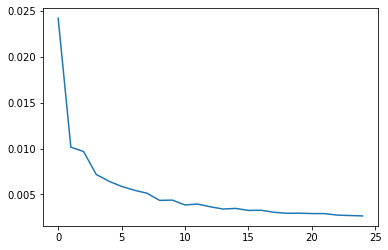

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

In [20]:
# vemos que el error de predicción baja hasta 0

In [21]:
# hacemos ahora la predicción usando el modelo RNN
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    # y volvemos a ejecutar

In [22]:
# ahora tengo mis datos de test_predictions
test_predictions

[array([0.25525355], dtype=float32),
 array([0.2233893], dtype=float32),
 array([0.18355471], dtype=float32),
 array([0.15256001], dtype=float32),
 array([0.14260617], dtype=float32),
 array([0.15870015], dtype=float32),
 array([0.19865184], dtype=float32),
 array([0.25369844], dtype=float32),
 array([0.32001448], dtype=float32),
 array([0.39984414], dtype=float32),
 array([0.45626083], dtype=float32),
 array([0.47111857], dtype=float32),
 array([0.4266229], dtype=float32),
 array([0.35606134], dtype=float32),
 array([0.28820682], dtype=float32),
 array([0.24603705], dtype=float32),
 array([0.24471304], dtype=float32),
 array([0.2869788], dtype=float32),
 array([0.3273278], dtype=float32),
 array([0.3563694], dtype=float32),
 array([0.36203244], dtype=float32),
 array([0.342995], dtype=float32),
 array([0.32111117], dtype=float32),
 array([0.3067025], dtype=float32),
 array([0.28638846], dtype=float32),
 array([0.2516172], dtype=float32),
 array([0.20754752], dtype=float32),
 array([0.

In [23]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[288.58669782],
       [253.18550977],
       [208.92928165],
       [174.49417172],
       [163.43545374],
       [181.31587024],
       [225.70218904],
       [286.85896507],
       [360.5360837 ],
       [449.22683933],
       [511.90578231],
       [528.41273057],
       [478.978039  ],
       [400.58414805],
       [325.19777226],
       [278.34716375],
       [276.87618545],
       [323.83345905],
       [368.66117233],
       [400.92641005],
       [407.21804449],
       [386.06743163],
       [361.75451258],
       [345.74647152],
       [323.17757553],
       [284.54670167],
       [235.58528987],
       [190.39867662],
       [161.19800325],
       [150.16535969],
       [159.49761967],
       [189.61947349],
       [245.56048721],
       [330.34852234],
       [418.8916719 ],
       [482.9831368 ],
       [516.39733782],
       [484.94883385],
       [391.53968349],
       [300.08725727],
       [230.37113342],
       [197.80783606],
       [197.33154324],
       [220

In [24]:
test['predictions'] = true_predictions

<ipython-input-24-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [25]:
test

,value,predictions
time,,
2021-07-25 01:00:00,322.0,288.586698
2021-07-25 02:00:00,218.0,253.185510
2021-07-25 03:00:00,227.0,208.929282
2021-07-25 04:00:00,159.0,174.494172
2021-07-25 05:00:00,97.0,163.435454
...,...,...
2021-07-31 20:00:00,574.0,401.386545
2021-07-31 21:00:00,484.0,516.620634
2021-07-31 22:00:00,385.0,622.020808


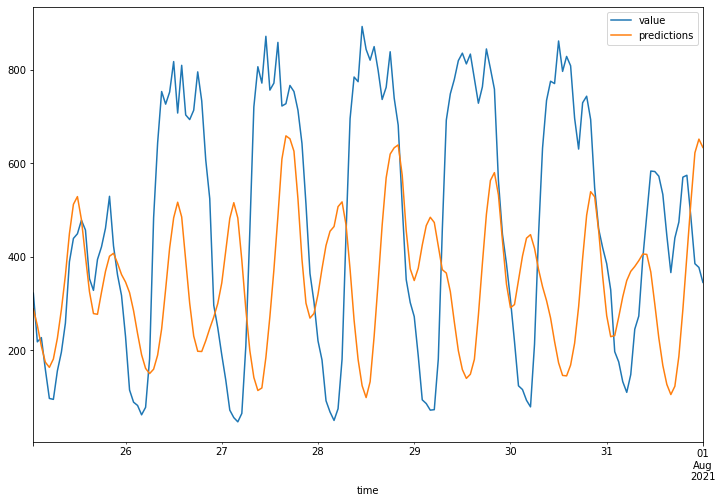

In [26]:
test.plot(figsize=(12,8))

In [28]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['value'],test['predictions'])

265.9888699475144

In [29]:
test['value'].describe()

count    168.000000
mean     474.303571
std      264.424553
min       47.000000
25%      219.750000
50%      458.000000
75%      734.500000
max      892.000000
Name: value, dtype: float64

In [30]:
np.sqrt(mean_squared_error(test['value'],test['predictions']))

333.4550185192464

In [31]:
# error sqrt.
333.5*100/474.3

70.31414716424204

In [32]:
# en este caso el error de predicción es muy grande, hasta un 70,3%.

## Modelo 4. Facebook's Prophet

In [41]:
# Usamos la bibliote de predicciones de la libreria de Facebook.
# diseñada para conjunto de datos comerciales comunes en Facebook.

In [42]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [43]:
# realizamos la carga del archivo
df = pd.read_csv('TrafhorasE19BrMur1sentv6.csv')

In [44]:
# cambiamos la columna de FDIA al formato datatime y lo pasamos a indice, 
df.columns = ['ds','y']
df['ds']=pd.to_datetime(df['ds'])

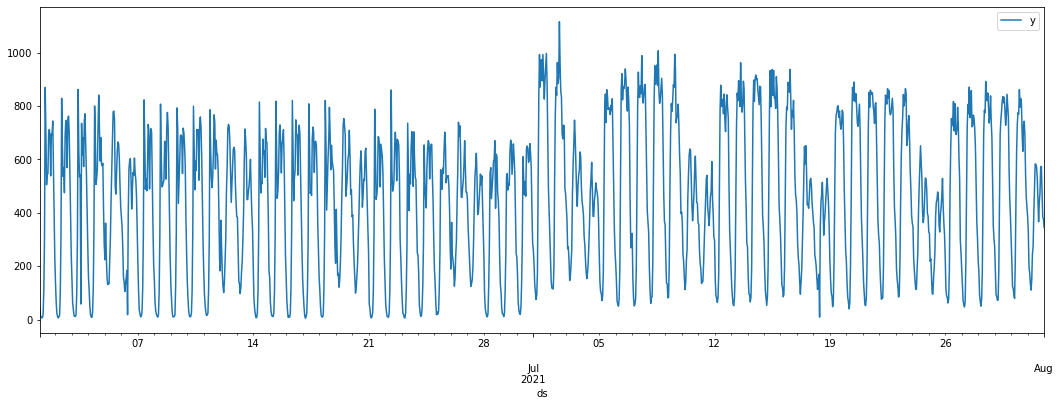

In [45]:
df.plot(x='ds',y='y',figsize=(18,6))

In [46]:
df.head()

,ds,y
0,2021-06-01 01:00:00,51.0
1,2021-06-01 02:00:00,14.0
2,2021-06-01 03:00:00,10.0
3,2021-06-01 04:00:00,6.0
4,2021-06-01 05:00:00,7.0


In [47]:
len(df)

1464

In [48]:
train = df.iloc[:1296]
test = df.iloc[1296:]

In [50]:
# genero el modelo de predicción
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=168,freq='H')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [51]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1459,2021-07-31 20:00:00,458.083726,460.075079,765.278515,448.819307,466.117085,159.086611,159.086611,159.086611,204.249278,204.249278,204.249278,-45.162667,-45.162667,-45.162667,0.0,0.0,0.0,617.170337
1460,2021-07-31 21:00:00,457.964666,362.444311,677.369589,448.598648,466.179645,71.116433,71.116433,71.116433,120.537048,120.537048,120.537048,-49.420615,-49.420615,-49.420615,0.0,0.0,0.0,529.081099
1461,2021-07-31 22:00:00,457.845606,252.237076,536.698862,448.384965,466.183338,-65.482185,-65.482185,-65.482185,-11.932158,-11.932158,-11.932158,-53.550027,-53.550027,-53.550027,0.0,0.0,0.0,392.363421
1462,2021-07-31 23:00:00,457.726546,106.674112,422.963119,448.148396,466.126294,-198.432584,-198.432584,-198.432584,-140.907475,-140.907475,-140.907475,-57.525109,-57.525109,-57.525109,0.0,0.0,0.0,259.293962
1463,2021-08-01 00:00:00,457.607486,14.496937,333.599089,447.934615,466.060364,-284.675168,-284.675168,-284.675168,-223.354530,-223.354530,-223.354530,-61.320638,-61.320638,-61.320638,0.0,0.0,0.0,172.932318


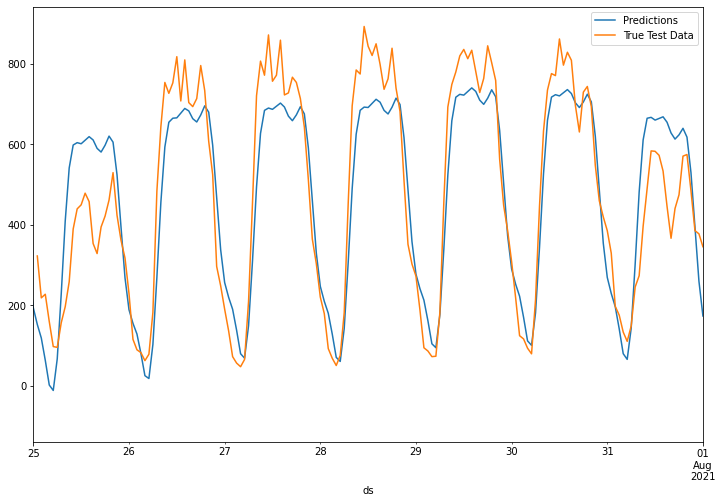

In [55]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2021-07-25','2021-08-01'))

In [56]:
# evaluamos la predicción
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-168:]['yhat']
predictions

1296    151.860016
1297    118.352937
1298     62.883537
1299      1.474800
1300    -11.984384
           ...    
1459    617.170337
1460    529.081099
1461    392.363421
1462    259.293962
1463    172.932318
Name: yhat, Length: 168, dtype: float64

In [57]:
test['y']

1296    322.0
1297    218.0
1298    227.0
1299    159.0
1300     97.0
        ...  
1459    574.0
1460    484.0
1461    385.0
1462    377.0
1463    345.0
Name: y, Length: 168, dtype: float64

In [58]:
rmse(predictions,test['y'])

110.8120078868911

In [59]:
test.mean()

y    474.303571
dtype: float64

In [60]:
# % de error sobre la media (comparación valores)
110.8*100/474.3

23.360742146320895

In [38]:
# la predicción del error es del 23.4%, es un valor similar al modelo 2.
# al observar los valores.


## Predicción de datos de Agosto con Modelo 4. Prophet.

In [61]:
# calculo de predicción con este modelo.
m = Prophet()
m.fit(df)
future_ago = m.make_future_dataframe(periods=168,freq='H')
forecast_ago = m.predict(future_ago)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [62]:
predictions_ago = forecast_ago.iloc[-168:]['yhat']
predictions_ago

1464    127.913187
1465     91.342502
1466     33.774637
1467    -25.690365
1468    -33.890031
           ...    
1627    590.126725
1628    499.083389
1629    363.363523
1630    234.371968
1631    151.415808
Name: yhat, Length: 168, dtype: float64

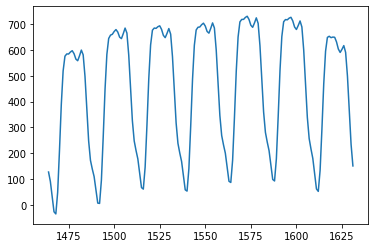

In [63]:
# representamos los valores de la predicción:
predictions_ago.plot()

In [42]:
# guardamos los datos de predicción de trafico por horas de la primera semana de agosto.

predictions_ago.to_csv('Pred7Mod4horasE19BM.csv')

In [43]:
# trabajo terminado. Hemos utilizado 4 modelos y guardado 3 archivos para 
# visualizarlos despues y elegir el mejor para el uso de los datos predichos
# para la primera semana de agosto, por horas.

In [64]:
# Trabajo de Mariano Ahijado García. TFM VIU. Master Big Data 2020-21.